# Setting the libraries

In [1]:
import numpy as np 
import pandas as pd

# plottinf
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting the data

In [2]:
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')
gender = pd.read_csv('../input/titanic/gender_submission.csv')

# Analyzing the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* PassagerId: the ID of each passager
* Survived: if the passager survived
* Pclas: class of each passager
* Name: name of each passager
* Sex: sex os each passager
* Age: age of each passager
* SibSp: (number of siblings on board) / (number of spouse on board)
* ParCh: (number of Parents on board) / (number of Children on board)
* Ticket: number of the ticket
* Fare: ticket price
* Cabin: identification of the cabin
* Embarked: if the passager embarked or not


In [4]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


* PassagerId: the ID of each passager
* Survived: if the passager survived

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
gender.columns

Index(['PassengerId', 'Survived'], dtype='object')

### Data type in each column

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
gender.dtypes

PassengerId    int64
Survived       int64
dtype: object

**Data type**
* Categorical: Survived, Sex, and Embarked;
* Ordinal: Pclass;
* Continous: Age, Fare; 
* Discrete: SibSp, Parch.

### Verify if there is any missing value in each column

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Train dataset**
* 177 passengers with NaN age
* 687 passengers with NaN Cabin
* 2 passengers with NaN Embarked

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Test dataset**
* 86 passengers with NaN age
* 327 passengers with NaN Cabin


In [11]:
gender.isna().sum()

PassengerId    0
Survived       0
dtype: int64

**gender dataset**
* No missing value

In [12]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [13]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [14]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mannion, Miss. Margareth",male,1601,G6,S
freq,1,577,7,4,644


In [15]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Roth, Miss. Sarah A",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [16]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


Assign gender dataframe to test dataframe

In [17]:
test = test.assign(Survived = gender['Survived']) 

## Dealing with missing values

**Drop**:
* PassengerId (do not contribute)
* Name (do not contribute)
* Ticket (high ratio of duplicates)
* Cabin (high number of missing values)

In [18]:
columns = ['Name', 'Ticket', 'Cabin']
train.drop(columns, axis=1, inplace=True)

In [19]:
test.drop(columns, axis=1, inplace=True)

Take off people without information about Embarked in train dataset

Drop line without value in Embarked column in train

In [20]:
train.dropna(subset=['Embarked'], how='all', inplace=True)

Fill NaN values in Age column with avarege 

In [21]:
train['Age'] = train['Age'].fillna((train['Age'].mean()))

In [22]:
test['Age'] = test['Age'].fillna((train['Age'].mean()))
test['Fare'] = test['Fare'].fillna((train['Fare'].mean()))

Dataset with the PassengerId

In [23]:
PassengerId_train = train['PassengerId']

In [24]:
PassengerId_test = test['PassengerId']

Drop PassengerId 

In [25]:
train.drop('PassengerId', axis=1, inplace=True)

In [26]:
test.drop('PassengerId', axis=1, inplace=True)

### Verify correlation

**Some assumptions about the data**
* Womem were more likely to have survived.
* Children were more likely to have survived.
* The upper-class passengers were more likely to have survived.

In [27]:
train_Pclass_Survived = train[['Pclass', 'Survived']].groupby(['Pclass']) #use just Pclass and Survived and group by Pclass

In [28]:
train_Pclass_Survived.mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


Passengers at the first class are more likely to have survived

In [29]:
train_Age_Survived = train[['Age', 'Survived']].groupby(['Age']) #use just Age and Survived and group by Pclass

In [30]:
train_Age_Survived.mean().sort_values(by='Age', ascending = False)

,Survived
Age,
80.00,1.0
74.00,0.0
71.00,0.0
70.50,0.0
70.00,0.0
...,...
0.92,1.0
0.83,1.0
0.75,1.0


The oldest passengers have not survived. But this table is inconclusive about other middle ages.

In [31]:
train_Sex_Survived = train[['Sex', 'Survived']].groupby(['Sex']) #use just Sex and Survived and group by Pclass

In [32]:
train_Sex_Survived.mean().sort_values(by='Sex', ascending = False)

,Survived
Sex,
male,0.188908
female,0.740385


Female are mor likely to have survived

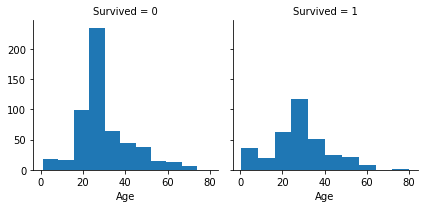

In [33]:
h = sns.FacetGrid(train, col='Survived')
h.map(plt.hist, 'Age')

* People with age between 20 and 40 are more likely to have survived

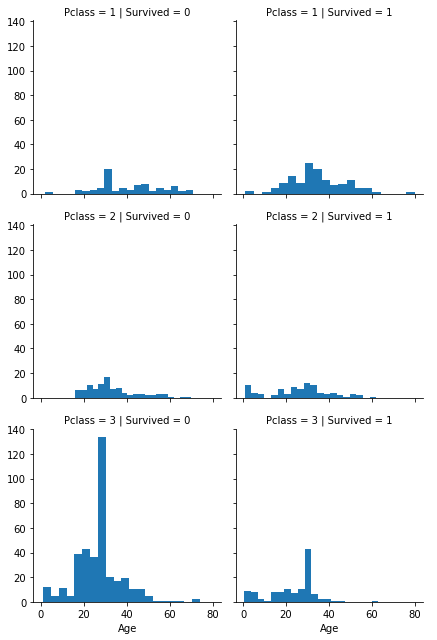

In [34]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

* Passengers in the 3 class are less likely to have survived

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Apply one hot encoded to get numerical values

In [36]:
train_oneHot = pd.get_dummies(train)

In [37]:
test_oneHot = pd.get_dummies(test)

In [38]:
test_oneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Survived    418 non-null    int64  
 6   Sex_female  418 non-null    uint8  
 7   Sex_male    418 non-null    uint8  
 8   Embarked_C  418 non-null    uint8  
 9   Embarked_Q  418 non-null    uint8  
 10  Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


## Predictions

Use the predictive modelling algorithms:
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

First separete de features and the target:

In [39]:
x_train = train_oneHot.drop("Survived", axis=1)
y_train = train_oneHot["Survived"]

In [40]:
x_test = test_oneHot.drop("Survived", axis=1)
y_test = test_oneHot["Survived"]

Logistic Regression:

In [41]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score_log = logreg.score(x_test, y_test)
score_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9473684210526315

**Support Vector Machines**

In [42]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
score_svc = svc.score(x_test, y_test)
score_svc

0.6555023923444976

**KNN**

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
score_knn = knn.score(x_test, y_test)
score_knn

0.7129186602870813

**Gaussian Naive Bayes**

In [44]:
gNB = GaussianNB()
gNB.fit(x_train, y_train)
y_pred = gNB.predict(x_test)
score_gNB = gNB.score(x_test, y_test)
score_gNB

0.916267942583732

**Perceptron**

In [45]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
score_perceptron = perceptron.score(x_train, y_train)
score_perceptron

0.4184476940382452

**Linear SVC**

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
score_linear_svc = linear_svc.score(x_test, y_test)
score_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8755980861244019

**Stochastic Gradient Descent**

In [47]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
score_sgd = sgd.score(x_test, y_test)
score_sgd

0.8157894736842105

**Decision Tree**

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
score_decision_tree = decision_tree.score(x_test, y_test)
score_decision_tree

0.7990430622009569

**Random Forest**

In [49]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
score_random_forest = random_forest.score(x_test, y_test)
score_random_forest

0.8301435406698564

**Summarize the results**

In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [score_svc, score_knn, score_log, 
              score_random_forest, score_gNB, score_perceptron, 
              score_sgd, score_linear_svc, score_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.947368
4,Naive Bayes,0.916268
7,Linear SVC,0.875598
3,Random Forest,0.830144
6,Stochastic Gradient Decent,0.815789
8,Decision Tree,0.799043
1,KNN,0.712919
0,Support Vector Machines,0.655502
5,Perceptron,0.418448


## Conclusion

Put back the PassengerId column

Logistic Regression is provides the best model

In [51]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score_log = logreg.score(x_test, y_test)
score_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9473684210526315

In [52]:
train = train.assign(PassengerId = PassengerId_train)
test = test.assign(PassengerId = PassengerId_test)

In [53]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })


In [54]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [55]:
submission.to_csv('submission.csv', index = False) 

In [56]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


![](http://)

![](http://)